# Data Analysis (Part 1: OECD)

### HISTORY
* 10/25/20 Initial exploration of OECD dataset
* 11/13/20 Data analysis of OECD data from 2015

---

In this notebook, I clean the data frame by filtering only data from 2015. Then I create separate data frames for OECD and non_OECD nations. Lastly, I attempt some statistical analysis to answer the following questions:
* Which OECD country has the highest percentage of parental involvement?
* How do standardized test scores compare between OECD and non-OECD countries?
* What percentage of countries have a majority of students who wish to pursue higher education?
* Are children with more involved parents more academically driven?
* Do children with more involved parents perform better in standardized testing? (And other questions about associations)

In [1]:
#Importing necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Reading in my data file
oecd_df = pd.read_csv("../data/cleaned/CLEAN_OECD_child_wellbeing.csv")

## More Data Cleaning

Because OECD only had relatively consistent data for each country in the 2015 survey, I have chosen to only use from that year to complete this analysis. I will update to only include values from 2015 by subsetting the imported data.

In [3]:
#Subestting the original data frame by data from 2015
filter2015 = oecd_df['year']==2015
oecd2015_df = oecd_df[filter2015]
oecd2015_df.head(5)

,country_code,country,indicator_code,indicator,year,data_value
2,AUS,Australia,CWB8A,Adolescents (15-year-olds) who report talking ...,2015,96.7
3,AUS,Australia,CWB16,Adolescents (15-year-olds) skipping either bre...,2015,22.1
4,AUS,Australia,CWB17A,Adolescents (15-year-olds) who report doing no...,2015,6.5
5,AUS,Australia,CWB17B,Adolescents (15-year-olds) who report regularl...,2015,52.5
7,AUS,Australia,CWB22,Children (3-5 year-olds) enrolled in pre-prima...,2015,86.5


Next, I want to create a new variable distinguishing between OECD and non-OECD nations. The data includes some data from non-OECD nations probably for the purpose of comparing. A variable the identifies the country as OECD or not will be useful for subsetting the data frame later.

In [4]:
#Checking to see which countries are in the data frame
oecd2015_df.groupby(['country']).size()

country
Australia          17
Austria            26
Belgium            26
Brazil             17
Bulgaria           23
Canada             16
Chile              21
Colombia           17
Costa Rica         18
Croatia            24
Cyprus              7
Czech Republic     26
Denmark            24
Estonia            26
Finland            26
Flanders            1
France             27
Germany            25
Greece             26
Hungary            26
Iceland            24
Indonesia           4
Ireland            27
Israel             17
Italy              25
Japan              23
Korea              21
Latvia             26
Lithuania          26
Luxembourg         27
Malta              11
Mexico             20
Netherlands        26
New Zealand        17
Norway             21
OECD - Average     18
Peru               16
Poland             26
Portugal           27
Romania            11
Russia             17
Slovak Republic    25
Slovenia           26
South Africa        2
Spain              27
Sw

In [5]:
#Making a list to filter out non-OECD nations
non_oecd_countries = ['Bulgaria', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Indonesia', 
                      'Malta', 'Peru', 'Romania', 'Russia', 'South Africa']

In [6]:
#Creating a new columns where, if the country is in the `non_oecd_countries` list, it will identify as such
#If not, it identifies the country as OECD
oecd2015_df['in_oecd'] = np.where(oecd2015_df['country'].isin(non_oecd_countries), 'non_oecd', 'oecd')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Checking that it worked
oecd2015_df['in_oecd'].value_counts()

oecd        898
non_oecd    150
Name: in_oecd, dtype: int64

In [8]:
oecd2015_df.head()

,country_code,country,indicator_code,indicator,year,data_value,in_oecd
2,AUS,Australia,CWB8A,Adolescents (15-year-olds) who report talking ...,2015,96.7,oecd
3,AUS,Australia,CWB16,Adolescents (15-year-olds) skipping either bre...,2015,22.1,oecd
4,AUS,Australia,CWB17A,Adolescents (15-year-olds) who report doing no...,2015,6.5,oecd
5,AUS,Australia,CWB17B,Adolescents (15-year-olds) who report regularl...,2015,52.5,oecd
7,AUS,Australia,CWB22,Children (3-5 year-olds) enrolled in pre-prima...,2015,86.5,oecd


In [9]:
#Saving the data frame as a .csv file in the `cleaned` data folder
oecd2015_df.to_csv('../data/cleaned/OECD_child_wellbeing_2015.csv', index=False)

In [10]:
#Subsetting based on OECD status
non_oecd_filter = oecd2015_df['in_oecd'] == 'non_oecd'
non_oecd_df = oecd2015_df[non_oecd_filter]
non_oecd_df['country'].unique()
non_oecd_df = pd.DataFrame(data = non_oecd_df)
non_oecd_df.head()

,country_code,country,indicator_code,indicator,year,data_value,in_oecd
1624,BGR,Bulgaria,CWB1A,Children (0-17) living with two parents (%),2015,81.4,non_oecd
1629,BGR,Bulgaria,CWB1B,Children (0-17) living with a single parent (%),2015,16.5,non_oecd
1634,BGR,Bulgaria,CWB1C,Children (0-17) living in 'other' types of hou...,2015,2.1,non_oecd
1639,BGR,Bulgaria,CWB2A,Children (0-14) in households where all adults...,2015,46.2,non_oecd
1644,BGR,Bulgaria,CWB2C,Children (0-14) in households with all adults ...,2015,17.1,non_oecd


In [11]:
oecd_filter = ~oecd2015_df['country'].isin(non_oecd_countries)
no_avg_filter = oecd2015_df['country']!= 'OECD - Average'
oecd_df = oecd2015_df[(oecd_filter) & (no_avg_filter)]
oecd_df['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       'Estonia', 'Israel', 'Latvia', 'Lithuania', 'Slovenia', 'Flanders'],
      dtype=object)

Lastly, I would like to check which variables are in these data frames so I can choose which variables to analyze. Because only a few of these variables have data for all nations in the data frame, I will only use indicators where data is recorded in more than 43 countries.

In [12]:
oecd2015_df.groupby(['indicator_code', 'indicator']).size().sort_values(ascending=False).to_frame()

,,0
indicator_code,indicator,
CWB35B,Mathematics performance at age 15 (PISA),47
CWB35A,Reading performance at age 15 (PISA),47
CWB32,Adolescents (15-year-olds) who feel like they belong in school (%),46
CWB33,Adolescents (15-year-olds) who feel like outsiders at school (%),46
CWB22,Children (3-5 year-olds) enrolled in pre-primary education or primary school (%),45
CWB30,Adolescents (15-year-olds) who feel anxious about school tests even when well-prepared (%),44
CWB28,Adolescents (15-year-olds) who study before or after school (%),44
CWB29,Adolescents (15-year-olds) who want top grades at school (%),44
CWB16,Adolescents (15-year-olds) skipping either breakfast or dinner (%),44


I will update the OECD and non-OECD data frames to have the data value for each indicator in its own column using the `pd.melt()` function.

In [13]:
oecd_df.columns

Index(['country_code', 'country', 'indicator_code', 'indicator', 'year',
       'data_value', 'in_oecd'],
      dtype='object')

In [14]:
#Creating a list of variables to use "identifiers"
index_cols = ['country_code', 'country'] 

#Melting both data frames
oecd2_df = oecd_df.pivot(index=index_cols,
                  columns='indicator_code',
                  values='data_value')
non_oecd2_df = non_oecd_df.pivot(index=index_cols,
                  columns='indicator_code',
                  values='data_value')
#Checking that it worked
oecd2_df.head(5)

,indicator_code,CWB16,CWB17A,CWB17B,CWB1A,CWB1B,CWB1C,CWB22,CWB27,CWB28,CWB29,...,CWB35A,CWB35B,CWB40,CWB44A,CWB44B,CWB50A,CWB50B,CWB8A,CWB8B,CWB9
country_code,country,,,,,,,,,,,,,,,,,,,,,
AUS,Australia,22.1,6.5,52.5,NaN,NaN,NaN,86.5,92.7,76.2,89.2,...,502.9,493.9,69.2,NaN,NaN,18.0,2.0,96.7,NaN,NaN
AUT,Austria,37.9,6.1,42.7,81.3,18.3,0.4,88.1,90.3,86.7,77.9,...,484.9,496.7,59.4,39.7,11.1,60.0,8.7,94.4,NaN,24.6
BEL,Belgium,22.3,7.2,45.1,73.8,25.0,1.2,98.6,91.2,84.7,72.1,...,498.5,507.0,59.5,32.8,8.3,32.3,19.3,95.1,NaN,3.7
BEL-VLG,Flanders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.2,NaN
BRA,Brazil,33.7,16.4,35.4,NaN,NaN,NaN,79.0,91.2,82.3,95.1,...,407.3,377.1,64.4,44.6,11.8,NaN,NaN,93.5,NaN,NaN


Next, I want to rename the 8 variables I will use to measure the effect of parental involvement. The independent variables I'm using are:
* CWB8A 	Adolescents (15-year-olds) who report talking to their parents before or after school
* CWB27 	Adolescents (15-year-olds) with parents interested in and supportive of their education

I am using these variables as dependent variables:
* CWB35B 	Mathematics performance at age 15 (PISA) 	
* CWB35A 	Reading performance at age 15 (PISA)
* CWB32 	Adolescents (15-year-olds) who feel like they belong in school 
* CWB30 	Adolescents (15-year-olds) who feel anxious about school tests even when well-prepared 
* CWB31 	Adolescents (15-year-olds) who expect to complete a university degree

In [15]:
#Creating a dictionary to name the columns something meaningful
indicator_dict = {
    'CWB35A': 'pisa_read',
    'CWB35B': 'pisa_math',
    'CWB32': 'belong',
    'CWB30': 'test_anx',
    'CWB29': 'top_grades',
    'CWB8A': 'talk_parents',
    'CWB31': 'college',
    'CWB27': 'parent_attn'
}

#Renaming columns in the OECD/non-OECD data frames
oecd2_df = oecd2_df.rename(columns=indicator_dict)
non_oecd2_df = non_oecd2_df.rename(columns=indicator_dict)

#Checking to see if it worked
oecd2_df.columns
#non_oecd2_df.columns

Index(['CWB16', 'CWB17A', 'CWB17B', 'CWB1A', 'CWB1B', 'CWB1C', 'CWB22',
       'parent_attn', 'CWB28', 'top_grades', 'CWB2A', 'CWB2C', 'CWB3',
       'test_anx', 'college', 'belong', 'CWB33', 'pisa_read', 'pisa_math',
       'CWB40', 'CWB44A', 'CWB44B', 'CWB50A', 'CWB50B', 'talk_parents',
       'CWB8B', 'CWB9'],
      dtype='object', name='indicator_code')

In [16]:
oecd2_df.head(5)

,indicator_code,CWB16,CWB17A,CWB17B,CWB1A,CWB1B,CWB1C,CWB22,parent_attn,CWB28,top_grades,...,pisa_read,pisa_math,CWB40,CWB44A,CWB44B,CWB50A,CWB50B,talk_parents,CWB8B,CWB9
country_code,country,,,,,,,,,,,,,,,,,,,,,
AUS,Australia,22.1,6.5,52.5,NaN,NaN,NaN,86.5,92.7,76.2,89.2,...,502.9,493.9,69.2,NaN,NaN,18.0,2.0,96.7,NaN,NaN
AUT,Austria,37.9,6.1,42.7,81.3,18.3,0.4,88.1,90.3,86.7,77.9,...,484.9,496.7,59.4,39.7,11.1,60.0,8.7,94.4,NaN,24.6
BEL,Belgium,22.3,7.2,45.1,73.8,25.0,1.2,98.6,91.2,84.7,72.1,...,498.5,507.0,59.5,32.8,8.3,32.3,19.3,95.1,NaN,3.7
BEL-VLG,Flanders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.2,NaN
BRA,Brazil,33.7,16.4,35.4,NaN,NaN,NaN,79.0,91.2,82.3,95.1,...,407.3,377.1,64.4,44.6,11.8,NaN,NaN,93.5,NaN,NaN


In [17]:
#Dropping the extra indicators I won't be using
cols_to_keep = ['parent_attn', 'top_grades', 'test_anx', 'college', 
                'belong', 'pisa_read', 'pisa_math', 'talk_parents']

#Filtering both df by the list of columns to keep
oecd2_df = oecd2_df[cols_to_keep]
non_oecd2_df = non_oecd2_df[cols_to_keep]

oecd2_df.columns

Index(['parent_attn', 'top_grades', 'test_anx', 'college', 'belong',
       'pisa_read', 'pisa_math', 'talk_parents'],
      dtype='object', name='indicator_code')

## Question 1
### Which OECD country has the highest percentage of adolescents who feel their parents support their education?

In [18]:
#Printing the maximum value and indexing the country with the max value
print(oecd2_df['parent_attn'].idxmax())
print(max(oecd2_df['parent_attn']))

('PRT', 'Portugal')
95.4


In [19]:
#Printing the miximum value and indexing the country with the max value
print(oecd2_df['parent_attn'].idxmin())
print(min(oecd2_df['parent_attn']))

('TUR', 'Turkey')
75.2


Portuguese adolescents felt the most support from their parents when it came to their academic goals, whereas Turkish adolescents felt their parents were the least supportive. 95.4% of Portuguese students received educational support, and 75.2% of Turkish students received support. Overall, a large majority of students in all OECD countries reported that their parents were interested in their educational development. These high proportions show that parents in OECD member countries generally value education.

Across OECD nations, **what is the average percentage of teens who feel their parents are interested in their education**?

In [20]:
oecd2_df['parent_attn'].mean()

90.44722222222224

An average of 90.4% of teens feel their parents are interested. This is a very high percentage, and it seems like OECD parents are rather attentive to their children's academic progress. What about the average proportion of teens in OECD countries who say they talk with their parents before and after school?

In [21]:
oecd2_df['talk_parents'].mean()

95.13783783783784

On average, 95.1% of teens in OECD countries speak with their parents before and after school. This average is higher than the proportion who feel they have their parent's support. It may be that even though parents are talking with their children, conservations may be critical of their academic performance/choices, or they may focus on a different subject entirely. Which countries have the highest/lowest proportion of teens who talk with their parents?

In [22]:
print(oecd2_df['talk_parents'].idxmax())
print(max(oecd2_df['talk_parents']))

('ISL', 'Iceland')
98.5


In [23]:
print(oecd2_df['talk_parents'].idxmin())
print(min(oecd2_df['talk_parents']))

('TUR', 'Turkey')
88.5


98.5% of Icelandish teens speak with their parents at least twice a day, while only 88.5% of Turkish teens can say the same. Again, both these proportions are higher than the first indicator of parental involvement. 

## Question 2
### How do standardized test scores compare between OECD and non-OECD countries?

Because OECD nations tend to be more developed nations with better educations systems, I think students from OECD nations will have better test scores on the PISA.

In [24]:
#Average math score in OECD nations
oecd2_df['pisa_math'].mean()

486.82162162162166

In [25]:
#Average math score in non-OECD nations
non_oecd2_df['pisa_math'].mean()

431.6111111111111

In [26]:
#Average reading score in OECD nations
oecd2_df['pisa_read'].mean()

489.7027027027027

In [27]:
#Average reading score in non-OECD nations
non_oecd2_df['pisa_read'].mean()

437.85555555555555

Let's plot these averages to compare visually! First, I will need a data frame with only the indicators for PISA scores. I will use the `oecd2015_df` data frame because it has data for both OECD and non_OECD countries.

In [28]:
#Creating a filter to subset by indicators
pisa_math_filter = oecd2015_df['indicator_code']== 'CWB35B' #Math score
pisa_read_filter = oecd2015_df['indicator_code']== 'CWB35A' #Reading score
remove_oecd_avg = oecd2015_df['country'] == 'OECD - Average' #Removes OECD Average data from the original df

#Using these filters to subset `oecd2015_df`
pisa_df = oecd2015_df[pisa_math_filter | pisa_read_filter]
pisa_df = pisa_df[-remove_oecd_avg]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


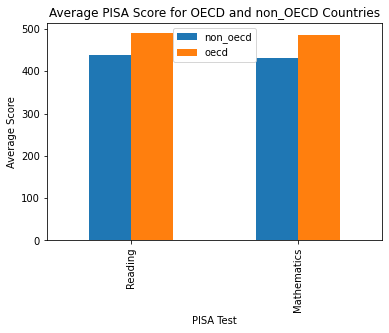

In [29]:
#Plotting the averages grouped by OECD or non_OECD member countries
avg_plot = pisa_df.groupby(['indicator_code', 'in_oecd'])['data_value'].mean().unstack().plot(kind='bar')

#Adding labels/title, moving legend
avg_plot.set_xlabel('PISA Test')
avg_plot.set_ylabel('Average Score')
avg_plot.set_title('Average PISA Score for OECD and non_OECD Countries')
avg_plot.set_xticklabels(['Reading','Mathematics'])
avg_plot.legend( loc = 'upper center')

This graph shows that, on average, OECD member countries had higher PISA scores in both the math and reading sections of the test. This would suggest that students from OECD member countries are better prepared in these content-areas. Another look at the distribution of scores below shows that--despite having a few countries with significantly lower average scores--the majority of OECD nations still have higher scores than non-OECD nations. For the reading test, some of the non-OECD countries had significantly higher scores than their counterparts.

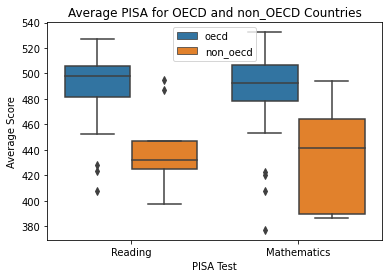

In [30]:
test_plot=sns.boxplot(y='data_value', x='indicator_code', hue='in_oecd', data=pisa_df)
test_plot.set_xticklabels(['Reading','Mathematics'])

#Adding labels/title, moving legend
test_plot.set_xlabel('PISA Test')
test_plot.set_ylabel('Average Score')
test_plot.set_title('Average PISA for OECD and non_OECD Countries')
test_plot.set_xticklabels(['Reading','Mathematics'])
test_plot.legend( loc = 'upper center')

## Question 3
### What percentage of countries have a majority of students who wish to pursue higher education?

_Step 1:_ Counting the number of OECD nations reporting data about the intentions to attend university. 

In [31]:
oecd2_df['college'].shape[0]

38

*Step 2*:  Create a data frame with only those countries that report 50% or more its adolescents intend to complete university. Count the number of countries in this data frame.

In [32]:
college50_filter = oecd2_df['college'] >= 50
college50_df = oecd2_df[college50_filter]
college50_df['college'].shape[0]

13

*Step 3*: Find the proportion of countries with a majority of college-bound students.

In [33]:
college50_df.head(5)

,indicator_code,parent_attn,top_grades,test_anx,college,belong,pisa_read,pisa_math,talk_parents
country_code,country,,,,,,,,
AUS,Australia,92.7,89.2,67.5,54.2,71.9,502.9,493.9,96.7
CAN,Canada,91.1,88.7,63.9,63.5,71.6,526.7,515.6,96.5
CHL,Chile,88.6,92.2,56.0,66.6,77.3,458.6,422.7,90.0
CZE,Czech Republic,87.9,81.1,40.3,55.6,70.9,487.3,492.3,96.4
ESP,Spain,90.0,77.1,67.1,51.0,87.2,495.6,485.8,94.8


In [34]:
(college50_df['college'].shape[0])/(oecd2_df['college'].shape[0])

0.34210526315789475

Only 34.2% of OECD member countries report that 50% or more of their adolescent citizens would like to attend a 4-year university in the future. This is a rather low percentage. It could be that the cost of college poses an obstacle to pursuing higher education. It might be good to explore the relationship between the average or median income in a country and its percentage of college bound students.

## Question 4
### How do measures of parental involvement affect a teen's academic drive?

What is the correlation between **parents who talk with their children and the desire to receive high grades**? I will run a regression model from the `oecd2_df` to determine whether there is a significant relationship between the two variables. A relationship is significant is the p-value is less than .05.

In [35]:
#Regression model: Talking consistently vs. wanting top grades?
model1 = smf.ols('top_grades ~ talk_parents', data=oecd2_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             top_grades   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                 2.210e-05
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.996
Time:                        17:09:40   Log-Likelihood:                -137.23
No. Observations:                  37   AIC:                             278.5
Df Residuals:                      35   BIC:                             281.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       84.0074     64.263      1.307      0.200     -46.454     214.469
talk_parents    -0.0032      0.675     -0.005      0.996      -1.374       1.368
==============================================================================
Omnibus:                        2.823   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.416
Skew:                          -0.519   Prob(JB):                        0.299
Kurtosis:                       2.302   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#The regression coefficient
model1.params[1]

-0.0031744171865595305

In [37]:
#The correlation coefficient
oecd2_df.corr().loc['talk_parents', 'top_grades']

-0.0007946324866480208

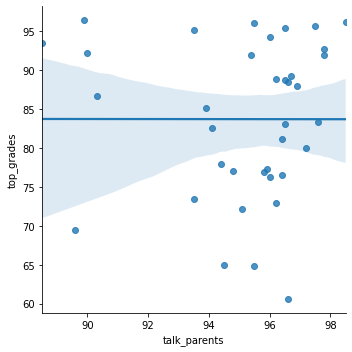

In [38]:
#Plotting the regression
sns.lmplot(x='talk_parents', y='top_grades', data=oecd2_df)

There is absolutely no significant relationship between parents who communicate consistently with their child and the child's desire to receive good grades. The correlation coefficient is pretty much 0, so there is no trend either, and the association seems to be completely random. 

#### What are the effect of interest and support on academic drive?

In [39]:
#Parental support vs. wanting top grades?
model2 = smf.ols('top_grades ~ parent_attn', data=oecd2_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             top_grades   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.1429
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.708
Time:                        17:09:40   Log-Likelihood:                -133.14
No. Observations:                  36   AIC:                             270.3
Df Residuals:                      34   BIC:                             273.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      68.0236     40.609      1.675      0.103     -14.504     150.551
parent_attn     0.1696      0.449      0.378      0.708      -0.742       1.081
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                2.091
Skew:                          -0.466   Prob(JB):                        0.352
Kurtosis:                       2.274   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#The regression coefficient
model2.params[1]

0.1696053740998258

In [41]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'top_grades']

0.06470390988330056

Though there is no **significant** relationship here either, the percent of students who want top grades does increase about .17 percentage points for each additional percent of teens who report their parents are supportive of their education. The correlation coefficient is .06, which means there is a very, very weak positive trend. (I won't plot it here.)

## Question 5
### Do children with more involved parents perform better in standardized testing?

What is the correlation between **supportive/interested parents** and the average **PISA Math scores** for a country? 

In [42]:
#PArental support vs. PISA math score
model = smf.ols('pisa_math ~ parent_attn', data=oecd2_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_math   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.888
Date:                Wed, 30 Dec 2020   Prob (F-statistic):             0.0568
Time:                        17:09:41   Log-Likelihood:                -175.09
No. Observations:                  36   AIC:                             354.2
Df Residuals:                      34   BIC:                             357.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     230.7600    130.219      1.772      0.085     -33.877     495.397
parent_attn     2.8363      1.438      1.972      0.057      -0.087       5.760
==============================================================================
Omnibus:                       20.242   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.772
Skew:                          -1.436   Prob(JB):                     7.65e-08
Kurtosis:                       6.687   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#The regression coefficient
model.params[1]

2.836319957980292

In [44]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'pisa_math']

0.3203299006282419

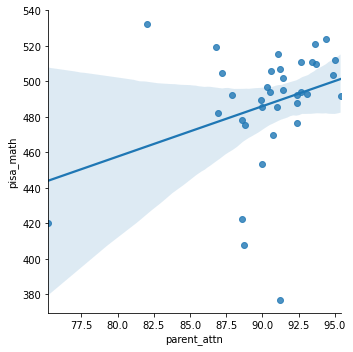

In [45]:
#Plotting the regression
sns.lmplot(x='parent_attn', y='pisa_math', data=oecd2_df)

There is a moderate, positive correlation between parental attention and math scores (corr coefficient = .32), but there is no significant relationship. For each additional percent of teens who report their parents are supportive of their education, the average PISA math score increases by 2.8 points. 

#### Between talking consistently and PISA math scores?

In [46]:
#Talking consistently vs. PISA math score
model3 = smf.ols('pisa_math ~ talk_parents', data=oecd2_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_math   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     8.920
Date:                Wed, 30 Dec 2020   Prob (F-statistic):            0.00512
Time:                        17:09:41   Log-Likelihood:                -177.39
No. Observations:                  37   AIC:                             358.8
Df Residuals:                      35   BIC:                             362.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -81.3066    190.288     -0.427      0.672    -467.611     304.998
talk_parents     5.9716      1.999      2.987      0.005       1.913      10.031
==============================================================================
Omnibus:                        9.278   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.292
Skew:                          -0.658   Prob(JB):                      0.00353
Kurtosis:                       5.365   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

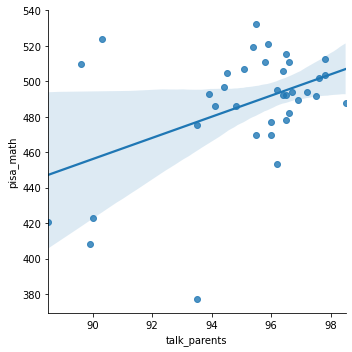

In [47]:
#Plotting the regression
sns.lmplot(x='talk_parents', y='pisa_math', data=oecd2_df)

In [48]:
#The correlation coefficient
oecd2_df.corr().loc['talk_parents', 'pisa_math']

0.45066208244829536

There IS (finally) a significant relationship between talking consistently and math test scores, and a moderate, positive correlation. For each additional percent of teens who report talking to their parents regularly, the average PISA math score increases by 6 points. 

Are there similar trends with a country's **average PISA Reading score**, as well?
#### What is the association between parental support/attention and PISA **Reading** scores?

In [49]:
#Parental support vs. PISA reading score
model10 = smf.ols('pisa_read ~ parent_attn', data=oecd2_df).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_read   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     5.550
Date:                Wed, 30 Dec 2020   Prob (F-statistic):             0.0244
Time:                        17:09:42   Log-Likelihood:                -167.86
No. Observations:                  36   AIC:                             339.7
Df Residuals:                      34   BIC:                             342.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     239.2713    106.519      2.246      0.031      22.798     455.744
parent_attn     2.7721      1.177      2.356      0.024       0.381       5.163
==============================================================================
Omnibus:                       12.547   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.845
Skew:                          -1.059   Prob(JB):                     0.000985
Kurtosis:                       5.178   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'pisa_read']

0.3746046819503495

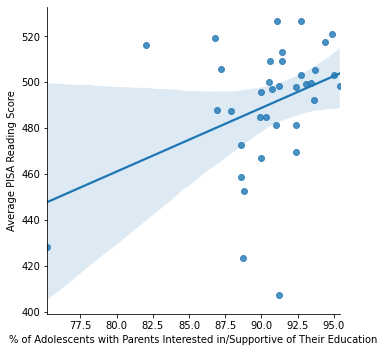

In [51]:
#Plotting the regression
attn_read_plt = sns.lmplot(x='parent_attn', y='pisa_read', data=oecd2_df)
attn_read_plt = (attn_read_plt.set_axis_labels('% of Adolescents with Parents Interested in/Supportive of Their Education', 
                                              'Average PISA Reading Score'))

#Saving the figure
attn_read_plt.savefig('../data_story_presentation/img/attn_read_plt.jpg', 
                                  bbox_inches='tight', dpi=300)

Again, there is a significant relationship between parental support/interest and better PISA reading scores. For each additional percent of teens who say they feel supported in their education, the average PISA reading score increases by 2.8 points. 

In [52]:
#Talking consistently vs. PISA reading score
model11 = smf.ols('pisa_read ~ talk_parents', data=oecd2_df).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_read   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     10.46
Date:                Wed, 30 Dec 2020   Prob (F-statistic):            0.00266
Time:                        17:09:42   Log-Likelihood:                -170.05
No. Observations:                  37   AIC:                             344.1
Df Residuals:                      35   BIC:                             347.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.8548    156.053     -0.095      0.925    -331.660     301.951
talk_parents     5.3034      1.640      3.234      0.003       1.975       8.632
==============================================================================
Omnibus:                        4.174   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.954
Skew:                          -0.438   Prob(JB):                        0.228
Kurtosis:                       4.072   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#The correlation coefficient
oecd2_df.corr().loc['talk_parents', 'pisa_math']

0.45066208244829536

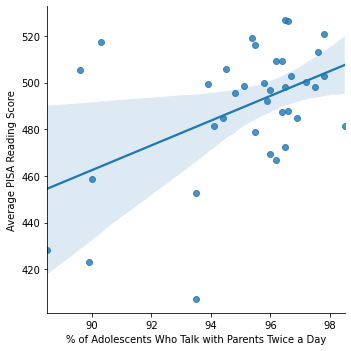

In [54]:
#Plotting the regression
talk_read_plt = sns.lmplot(x='talk_parents', y='pisa_read', data=oecd2_df)
talk_read_plt = (talk_read_plt.set_axis_labels('% of Adolescents Who Talk with Parents Twice a Day', 
                                              'Average PISA Reading Score'))

There is a significant relationship between talking consistently and better PISA reading scores. For each additional percent of teens who report talking to their parents regularly, the average PISA reading score increases by 5.3 points.
This leads to the question, "Is talking to your child consistently correlated with less test anxiety?"

## Question 6
### Are measures of parental involvement associated with test anxiety?

Do kids who report **talking to their parents before and after school** experience worry about school tests even when well-prepared?

In [55]:
#Talking consistently vs. Test anxiety
model4 = smf.ols('test_anx ~ talk_parents', data=oecd2_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               test_anx   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.04505
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.833
Time:                        17:09:43   Log-Likelihood:                -140.94
No. Observations:                  37   AIC:                             285.9
Df Residuals:                      35   BIC:                             289.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.2454     71.051      1.003      0.323     -72.997     215.487
talk_parents    -0.1585      0.747     -0.212      0.833      -1.674       1.357
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.878
Skew:                           0.021   Prob(JB):                        0.645
Kurtosis:                       2.246   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#The correlation coefficient
oecd2_df.corr().loc['talk_parents', 'test_anx']

-0.03585259892922092

There is no significant relationship test anxiety and more parent-child communication, and the correlation is close to 0. Does test anxiety decrease when parents show more attention to their child's education? Does more attention (or helicopter parenting) maybe have an adverse effect, causing the child to feel more nervous?

In [57]:
#Parental support vs. Test anxiety
model5 = smf.ols('test_anx ~ parent_attn', data=oecd2_df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               test_anx   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                   0.05218
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.821
Time:                        17:09:43   Log-Likelihood:                -137.04
No. Observations:                  36   AIC:                             278.1
Df Residuals:                      34   BIC:                             281.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.1664     45.254      1.020      0.315     -45.800     138.133
parent_attn     0.1142      0.500      0.228      0.821      -0.902       1.130
==============================================================================
Omnibus:                        0.625   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.684
Skew:                          -0.089   Prob(JB):                        0.710
Kurtosis:                       2.349   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'test_anx']

0.039143646002309726

No relationship there either, and the correlation is close to 0 showing no trend. 

## Question 7

### Do measures of  parental involvement correlate with the percentage of teens who feel they belong at school?

Does more **interest in a child's education** help a child feel more comfortable at school?

In [59]:
#Parent support vs. Sense of belonging
model6 = smf.ols('belong ~ parent_attn', data=oecd2_df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 belong   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5483
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.464
Time:                        17:09:43   Log-Likelihood:                -128.26
No. Observations:                  36   AIC:                             260.5
Df Residuals:                      34   BIC:                             263.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.3574     35.460      1.307      0.200     -25.707     118.422
parent_attn     0.2901      0.392      0.740      0.464      -0.506       1.086
==============================================================================
Omnibus:                       21.826   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.481
Skew:                          -1.526   Prob(JB):                     7.26e-09
Kurtosis:                       6.958   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'belong']

0.12597434914599703

There is a very weak, positive correlation between parental attention and sense of belonging (corr coefficient = .13), but there is no significant relationship. For each additional percent of teens who report their parents are supportive of their education, their sense of belonging at school increases by .29 percentage points. 

#### What about talking consistently and sense of belonging?

In [61]:
#Talking vs. Sense of belonging
model7 = smf.ols('belong ~ talk_parents', data=oecd2_df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 belong   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5176
Date:                Wed, 30 Dec 2020   Prob (F-statistic):              0.477
Time:                        17:09:43   Log-Likelihood:                -128.28
No. Observations:                  36   AIC:                             260.6
Df Residuals:                      34   BIC:                             263.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.5937     55.615      0.586      0.562     -80.429     145.616
talk_parents     0.4205      0.584      0.719      0.477      -0.767       1.608
==============================================================================
Omnibus:                       19.117   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.674
Skew:                          -1.434   Prob(JB):                     9.79e-07
Kurtosis:                       6.198   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, there is a very weak, positive correlation between more communicating and sense of belonging (corr coefficient = .12), but there is no significant relationship. For each additional percent of teens who report their parents are supportive of their education, their sense of belonging at school increases by .42 percentage points. 

### Is parental involvement related to intention to attend university?

How is **"talking before/after school"** related to the percentage of **teens who expect to complete a university degree**?

In [62]:
#Talking vs. "belonging" at school
model8 = smf.ols('college ~ talk_parents', data=oecd2_df).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                college   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.824
Date:                Wed, 30 Dec 2020   Prob (F-statistic):             0.0213
Time:                        17:09:43   Log-Likelihood:                -147.51
No. Observations:                  36   AIC:                             299.0
Df Residuals:                      34   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      274.9169     95.500      2.879      0.007      80.837     468.997
talk_parents    -2.4205      1.003     -2.413      0.021      -4.459      -0.382
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.255
Skew:                           0.009   Prob(JB):                        0.880
Kurtosis:                       2.588   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#The correlation coefficient
oecd2_df.corr().loc['talk_parents', 'college']

-0.38241813684203707

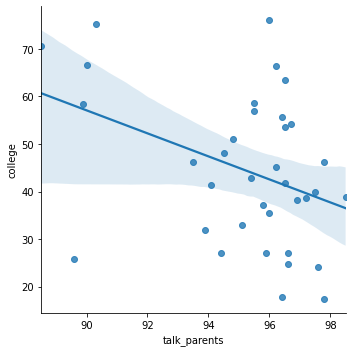

In [64]:
#Plotting the regression
sns.lmplot(x='talk_parents', y='college', data=oecd2_df)

Interestingly enough, there is a significant _negative_ relationship between more parent-child communication in a country and the proportion of that country's teen who intend to go to college. For each additional percent of teens who say they talk with their parents, intentions of going to college decreases by 2.4 percentage points on average. There is a moderately weak, negative trend between the two variables. Is the relationship the same for countries where parents take more interest in their child's education?

#### Between parental support and intention to go to college?

In [65]:
#Support vs. "belonging" at school
model9 = smf.ols('college ~ parent_attn', data=oecd2_df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                college   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     5.959
Date:                Wed, 30 Dec 2020   Prob (F-statistic):             0.0202
Time:                        17:09:43   Log-Likelihood:                -143.45
No. Observations:                  35   AIC:                             290.9
Df Residuals:                      33   BIC:                             294.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     192.5813     60.849      3.165      0.003      68.782     316.380
parent_attn    -1.6400      0.672     -2.441      0.020      -3.007      -0.273
==============================================================================
Omnibus:                        2.321   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.526
Skew:                           0.506   Prob(JB):                        0.466
Kurtosis:                       3.147   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#The correlation coefficient
oecd2_df.corr().loc['parent_attn', 'college']

-0.39109983651977503

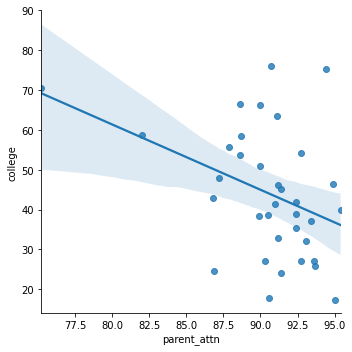

In [67]:
#Plotting the regression
sns.lmplot(x='parent_attn', y='college', data=oecd2_df)

This negative trend is very similar to the first. The trend is even slightly more negative than before. For each additional percent of teens who say parents support their education, intentions of going to college decreases by 1.64 percentage points on average. I am not sure what the implications of this are. Perhaps teens who spoke to their parents and had their support felt more comfortable in knowing their parents would support them whether or not the went to college, which allowed them more freedom with their post-secondary school plans. Alternatively, these teens could have parents who would prefer that they enter the workforce directly after college or take on family businesses instead of going to college.

## Scatterplot of significant relationships

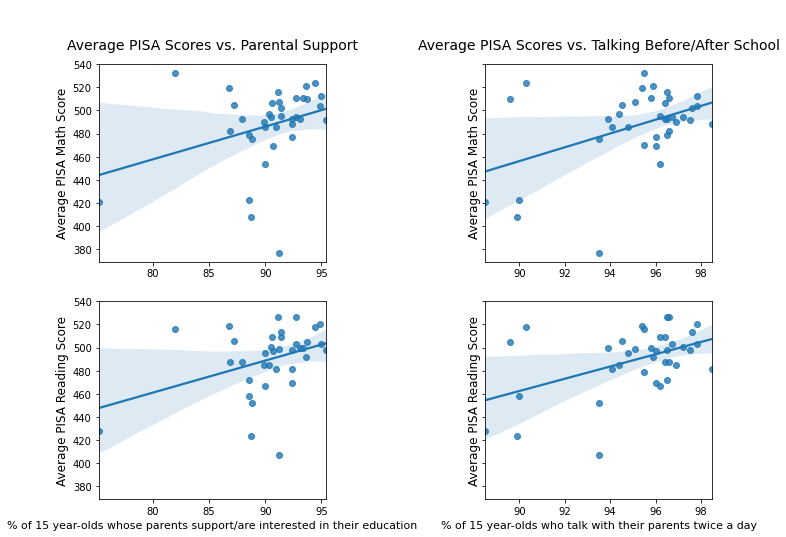

In [68]:
#Creating a figure with multiple graphs
fig, axes = plt.subplots(2, 2, figsize=(11,8), sharey=True)
fig.subplots_adjust(wspace = .7, hspace  = .2)
# fig.suptitle('In OECD nations, is more parental involvement associated with better standardized test scores?', 
#              fontsize=15)
fig.suptitle('\n', fontsize=15)#Just a space between the paragraph and the chart

#Creating regression plots
attn_math = sns.regplot(ax=axes[0, 0], x='parent_attn', y='pisa_math', data=oecd2_df)
talk_math = sns.regplot(ax=axes[0, 1], x='talk_parents', y='pisa_math', data=oecd2_df)
attn_read = sns.regplot(ax=axes[1, 0], x='parent_attn', y='pisa_read', data=oecd2_df)
talk_read = sns.regplot(ax=axes[1, 1], x='talk_parents', y='pisa_read', data=oecd2_df)


# Setting plot labels
attn_math.set_title('Average PISA Scores vs. Parental Support', pad = 15, fontsize = 14)
#attn_math.set_xlabel('% of 15 year-olds  whose parents support their education')
attn_math.set_xlabel('')
attn_math.set_ylabel('Average PISA Math Score', fontsize = 12) 

talk_math.set_title('Average PISA Scores vs. Talking Before/After School', pad = 15, fontsize = 14)
#talk_math.set_xlabel('% of 15 year-olds who talk with their parents twice a day')
talk_math.set_xlabel('')
talk_math.set_ylabel('Average PISA Math Score', fontsize = 12) 

#attn_read.set_title('Average PISA Reading Score vs. Parental Support')
attn_read.set_xlabel('% of 15 year-olds whose parents support/are interested in their education', fontsize = 11)
attn_read.set_ylabel('Average PISA Reading Score', fontsize = 12) 

#talk_read.set_title('Average PISA Reading Score vs. Talking Before/After School')
talk_read.set_xlabel('% of 15 year-olds who talk with their parents twice a day', fontsize = 11)
talk_read.set_ylabel('Average PISA Reading Score', fontsize = 12)


# Saving the figure
fig.savefig('../data_story_presentation/img/significant_plts.jpg', 
                                  bbox_inches='tight', dpi=300)